**Homeworks – Graph Theory and Algorithms, 2021/22. semester I.**

Week 2

- name: Nagy, Balázs
- neptun: hpq7oi
- e-mail: [balazs_nagy@outlook.com](balazs_nagy@outlook.com)

In [1]:
# set the seed so we can reproduce the pseudo-random results
set_random_seed(314159265)

Below you can see my implementation. 

In [2]:
import string
import numpy as np

In [3]:
def greedy_coloring_number(G, P, print_on=False):
    # define the colors palette
        # I use the alphabet as my coloring palette instead of numbers for an easier visual interpretation
    # colors_palette = list(range(n))
    colors_palette = list(string.ascii_lowercase)

    # create a map of the neighbors to each and every vertices
    neighbors = {v: G[v] for v in P}
    
    # no colors assigned yet for the vertices
    colors = {v: None for v in P}
    
    if print_on:
        print('The color palette:')
        print(colors_palette)
        
        print('The neighbours (v: [list neighbours of v]):')
        print(neighbors)

        print('Current coloring:')
        print(colors)
        print('\n')

    for v, neighbors in neighbors.items():
        # first we need to determine the existing color of neighbors as they are prohibited
        prohibited_colors = []
        for u in neighbors:
            if colors[u] is None:
                # if the neighbor u to v has no color then proceed to next neighbor
                pass
            else:
                # if the neighbor u to v has a color then v must not have that color
                prohibited_colors.append(colors[u])
            #print(f'u={u} is {colors[u]}')
        if prohibited_colors is None:
            # no limitations on the color, use first one
            next_color = colors_palette[0]
        else:
            # use the next available color in the palette for v
            next_color = sorted(list(set(colors_palette) - set(prohibited_colors)))[0]
        colors.update({v: next_color})
        if print_on:
            print(f'    {v}: {u}, color of neighbor u is {u}:{colors[u]}, prohibited {prohibited_colors}, setting v to {v}:{colors[v]}')
    if print_on:
        print('\n')
        print('The final coloring of vertices:')
        print(colors)
    #return colors
    return len(set(colors.values()))

In the next section I present the logic of my implementation on a $G$ graph with fewer vertices $n$, than required in *excercise 2*, hoping that it will be easier for the reader to understand.

You may play with the `n` parameter. Be careful, as in the last line of the next cell the chromatic number is also calculated, so don't set the paramter `n` too high.
Please note that by setting `print_on=True` the function `greedy_coloring_number()` will print out the calcuation steps of my implementation.

Random graph on n=5 vertices:


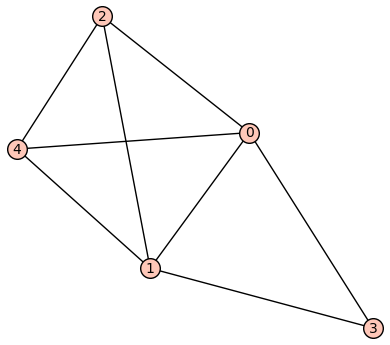

The order of edges for the greedy algorithm: [2, 1, 3, 0, 4]

The color palette:
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
The neighbours (v: [list neighbours of v]):
{2: [0, 1, 4], 1: [0, 2, 3, 4], 3: [0, 1], 0: [1, 2, 3, 4], 4: [0, 1, 2]}
Current coloring:
{2: None, 1: None, 3: None, 0: None, 4: None}


    2: 4, color of neighbor u is 4:None, prohibited [], setting v to 2:a
    1: 4, color of neighbor u is 4:None, prohibited ['a'], setting v to 1:b
    3: 1, color of neighbor u is 1:b, prohibited ['b'], setting v to 3:a
    0: 4, color of neighbor u is 4:None, prohibited ['b', 'a', 'a'], setting v to 0:c
    4: 2, color of neighbor u is 2:a, prohibited ['c', 'b', 'a'], setting v to 4:d


The final coloring of vertices:
{2: 'a', 1: 'b', 3: 'a', 0: 'c', 4: 'd'}


The number of colors required by the greedy algorithm: 4
The chromatic number is: 4


In [4]:
# vertices of the graph
n = 5

# generate a random graph on n nodes (result may be disconnected)
G = graphs.RandomGNP(n, 0.5)

# display the generated graph
print(f'Random graph on n={n} vertices:')
G.show()

# generate a random permutation of vertices for the greedy coloring algorithm
P = [i-1 for i in Permutations(n).random_element()]
print(f'The order of edges for the greedy algorithm: {P}\n')

# run and store the results of the greedy_coloring algorithm
greedy_result = greedy_coloring_number(G, P, print_on=True)
print('\n')
#print(f'The number of colors required: {len(set(greedy_result.values()))}')
print(f'The number of colors required by the greedy algorithm: {greedy_result}')
print(f'The chromatic number is: {G.chromatic_number()}')

Now, *excercise 2* requires the following:

> Let $G$ be a random graph on $100$ vertices given by the command
`graphs.RandomGNP(100,0.5)` and run your algorithm $30$ times with random permutations of the vertices, and collect the results into a `list`. You can call the random permutation with `Permutations(100).random_element()`, but be carefful since it contains the numbers from $1$ to $100$, and not from $0$ to $99$.

In [5]:
# vertices of the graph
n = 100

# iteration size of the greedy algorithm
k = 30

# generate a random graph on n nodes (result may be disconnected)
G = graphs.RandomGNP(n, 0.5)

First, let's try as the excercise asks: chossing $P$ as a random permutation of the vertices.

In [6]:
# run the algorithm and store the results in a list
greedy_results = [greedy_coloring_number(G, P=[i-1 for i in Permutations(n).random_element()]) for _ in range(k)]

print(f'The results of k={k} iteration of the greedy algorithm on a graph with n={n} vertices:')
print(greedy_results)
print(f'Best result: {min(greedy_results)}')

The results of k=30 iteration of the greedy algorithm on a graph with n=100 vertices:
[22, 21, 22, 23, 19, 22, 22, 21, 23, 21, 23, 21, 21, 20, 20, 23, 21, 21, 21, 21, 21, 20, 21, 22, 20, 21, 20, 22, 21, 22]
Best result: 19


As *excercise 4* suggests let's try out some heuristics on choosing the ordering of vertices for the greed algorithm. 

Let's try choosing $P$ using the *breadth first search* starting from a random node.

In [7]:
# run the algorithm and store the results in a list
greedy_results = [greedy_coloring_number(G, P=list(G.breadth_first_search(start=np.random.randint(0, n-1)))) for _ in range(k)]

print(f'The results of k={k} iteration of the greedy algorithm on a graph with n={n} vertices:')
print(greedy_results)
print(f'Best result: {min(greedy_results)}')

The results of k=30 iteration of the greedy algorithm on a graph with n=100 vertices:
[22, 21, 21, 22, 20, 20, 21, 22, 21, 22, 21, 21, 22, 21, 20, 23, 21, 22, 22, 21, 23, 21, 22, 20, 22, 21, 20, 21, 20, 20]
Best result: 20


Now, let's play with the degree numbering.

In [8]:
# map it's degree to each vertex
degree_dict = dict(zip(G.vertices(), G.degree()))

# list the vertices by descending degree
vertex_list_by_degree_desc = list(dict(sorted(degree_dict.items(), key = lambda x: x[1], reverse = True)).keys())

# vertex with highest degree
vertex_max_degree = vertex_list_by_degree_desc[0]

# list the vertices by ascending degree
vertex_list_by_degree_asc = list(dict(sorted(degree_dict.items(), key = lambda x: x[1], reverse = False)).keys())

# vertex with lowest degree
vertex_min_degree = vertex_list_by_degree_asc[0]

Let's try choosing $P$ using the *breadth first search* starting from the node with the lowest degree.

In [9]:
# run the algorithm and store the results in a list
greedy_results = [greedy_coloring_number(G, P=list(G.breadth_first_search(start=vertex_min_degree))) for _ in range(k)]

print(f'The results of k={k} iteration of the greedy algorithm on a graph with n={n} vertices:')
print(greedy_results)
print(f'Best result: {min(greedy_results)}')

The results of k=30 iteration of the greedy algorithm on a graph with n=100 vertices:
[23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23]
Best result: 23


Let's try choosing $P$ using the *breadth first search* starting from the node with the highest degree.

In [10]:
# run the algorithm and store the results in a list
greedy_results = [greedy_coloring_number(G, P=list(G.breadth_first_search(start=vertex_max_degree))) for _ in range(k)]

print(f'The results of k={k} iteration of the greedy algorithm on a graph with n={n} vertices:')
print(greedy_results)
print(f'Best result: {min(greedy_results)}')

The results of k=30 iteration of the greedy algorithm on a graph with n=100 vertices:
[21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21]
Best result: 21


Let $P$ be the vertexes by descending degree.

In [11]:
# run the algorithm and store the results in a list
greedy_results = [greedy_coloring_number(G, P=vertex_list_by_degree_desc) for _ in range(k)]

print(f'The results of k={k} iteration of the greedy algorithm on a graph with n={n} vertices:')
print(greedy_results)
print(f'Best result: {min(greedy_results)}')

The results of k=30 iteration of the greedy algorithm on a graph with n=100 vertices:
[21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21]
Best result: 21


Let $P$ be the vertexes by ascending degree.

In [12]:
# run the algorithm and store the results in a list
greedy_results = [greedy_coloring_number(G, P=vertex_list_by_degree_asc) for _ in range(k)]

print(f'The results of k={k} iteration of the greedy algorithm on a graph with n={n} vertices:')
print(greedy_results)
print(f'Best result: {min(greedy_results)}')

The results of k=30 iteration of the greedy algorithm on a graph with n=100 vertices:
[23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23]
Best result: 23


In *excercise 3* we need to show that for any graph $G$ there is always an ordering for which the
greedy algorithm uses exactly $\chi(G)$ colors!

Let's say we have a coloring of the vertices $c=\{c_1, c_2, \dots, \chi(G)\}$. We can order the vertices by their colors where $C_i$ contains all the vertices with color $c_i$. If we start the greedy coloring algorithm with the first vertex in $C_1$ it will automatically get the color $c_1$. Actually this is also true for any vertices in $C_1$ as they had the same color (as they are not adjacent). If we move on to $C_2$ it may happend that a vertex from $C_2$ is adjacent to a vertex in $C_1$ thus we need to use the color $c_2$ or it can get the same color $c_1$. We can see by induction that by ordering this way the greedy algorithm will use at most $c_i$ colors for vertices in $C_i$. As c was a coloring using $\chi(G)$ colors by ordering this way the greedy algorithm used chromatic number of colors. Of course algorithmically finding the best ordering is not optimal due to the non-linearity of the number of vertex ordering ($n!$).